In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(grid)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320

In [4]:
list_defs <- list()
for (idx in 1:3) {
    list_defs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_list_defplots.RData"))
}
list_defs <- Reduce(c, list_defs)
list_defs

[1] "CESC_figo" "CESC_surv" "UCS_figo"  "UCS_surv"  "UCEC_figo" "UCEC_surv"

In [5]:
list_defs_list <- c(
    mget("CESC_figo"),
    mget("CESC_surv")
)

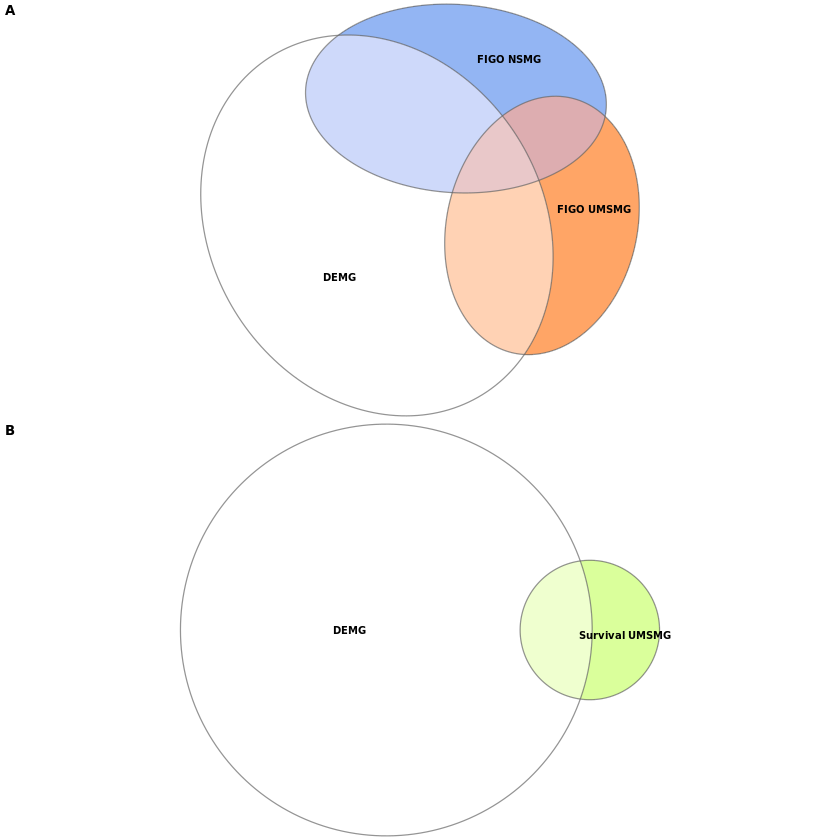

In [6]:
figS4 <- plot_grid(
    CESC_figo + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
    CESC_surv + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
    labels = c("A", "B"),
    label_size = label_text_size,
    label_fontfamily = family,
    nrow = 2
) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))
figS4

In [7]:
ggsave(figS4, filename = paste0(dirs$figures_dir, "/paneled/figureS3.png"), dpi = dpi, height = 4, width = 3)